In [1]:
import pandas as pd

# 导入数据

In [2]:
study_information=pd.read_csv('study_information.csv',
                             header=None,# 设置第一行开始就是数据
                             parse_dates=[2] # 设置第二列是时间格式
                             )
study_information.head() #只想显示数据前5行？
study_information.info()  # 显示数据基本信息
# 查看数据统计信息？ (只针对数字)
study_information.describe()
# 修改列名？
study_information.columns=['用户id','课程id','加入课程的时间','学习进度','课程单价']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194974 entries, 0 to 194973
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   0       194974 non-null  object        
 1   1       194974 non-null  object        
 2   2       194974 non-null  datetime64[ns]
 3   3       194974 non-null  object        
 4   4       190736 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 7.4+ MB


In [3]:
new_users=pd.read_csv('new_users.csv',
                     header=None,# 设置第一行开始就是数据
                     parse_dates=[1,2], # 设置第一、二列是时间格式
                     index_col=0# 不要序号列,把第一列设置成行索引        
                     )
# 查看数据统计信息？ (只针对数字)
new_users.info()
# 修改列名？
new_users.columns=[
                    '用户id',
                    '注册时间',
                    '最近访问时间',
                    '学习时长',
                    '加入班级数',
                    '退出班级数',
                    '用户所属学校',]
new_users.head()
new_users['最近访问时间']=pd.to_datetime(new_users['最近访问时间'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43916 entries, 0 to 43982
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   1       43916 non-null  object        
 1   2       43916 non-null  datetime64[ns]
 2   3       43724 non-null  object        
 3   4       43916 non-null  int64         
 4   5       43916 non-null  int64         
 5   6       43916 non-null  object        
 6   7       10569 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.7+ MB


In [4]:
login=pd.read_csv('login.csv',
                    header=None,# 设置第一行开始就是数据
                    parse_dates=[1], # 设置第二列是时间格式
                     )
# 查看数据统计信息？ (只针对数字)
login.info()
login.head()
# # 修改列名？
login.columns=[
'用户id',
'登陆时间',
'登陆地点',
]
login.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387144 entries, 0 to 387143
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   0       387144 non-null  object        
 1   1       387144 non-null  datetime64[ns]
 2   2       387144 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 8.9+ MB


,用户id,登陆时间,登陆地点
0,用户3,2018-09-06 09:32:47,中国广东广州
1,用户3,2018-09-07 09:28:28,中国广东广州
2,用户3,2018-09-07 09:57:44,中国广东广州
3,用户3,2018-09-07 10:55:07,中国广东广州
4,用户3,2018-09-07 12:28:42,中国广东广州


# 数据检查

## 重复值处理

In [5]:
# 查看重复数据
study_information.duplicated().sum()

0

In [6]:
new_users.duplicated().sum()

3

In [7]:
login.duplicated().sum()

0

In [8]:
# 怎么删除重复数据？
#方法一
new_users=new_users.drop_duplicates()
# 方法二
new_users.drop_duplicates(inplace=True)

## 缺失值处理

In [9]:
# 查看各数据每列缺了多少个? √‘

for i in new_users.columns:
    print(i,new_users[i].isnull().sum())
for i in login.columns:
    print(i,login[i].isnull().sum())
for i in study_information.columns:
    print(i,study_information[i].isnull().sum())

用户id 0
注册时间 0
最近访问时间 192
学习时长 0
加入班级数 0
退出班级数 0
用户所属学校 33344
用户id 0
登陆时间 0
登陆地点 0
用户id 0
课程id 0
加入课程的时间 0
学习进度 0
课程单价 4238


In [10]:
# 怎么处理空缺数据？
# 1\new_users里面的学校信息：删除一列？
# del new_users['用户所属学校']
# new_users.drop('用户所属学校',axis=1,inplace=True)
new_users=new_users.drop('用户所属学校',axis=1)
new_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43913 entries, 0 to 43982
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   用户id    43913 non-null  object        
 1   注册时间    43913 non-null  datetime64[ns]
 2   最近访问时间  43721 non-null  datetime64[ns]
 3   学习时长    43913 non-null  int64         
 4   加入班级数   43913 non-null  int64         
 5   退出班级数   43913 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 2.3+ MB


In [11]:
# 删除行，删除没有最近访问时间的行数据
# DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)
# how： 选择方式是全为空还是部分为空
new_users=new_users.dropna(subset=['最近访问时间'],  # 指定判断缺失数据的列
                           axis=0,  # 删除行或者列，0：行
                           how='any'  #判断subset里面的缺失类型
                          )

In [12]:
# 课程单价怎么处理？
# 缺失的课程单价都填充成0 怎么做？
study_information['课程单价'].fillna(value=0,inplace=True)

In [13]:
study_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194974 entries, 0 to 194973
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   用户id     194974 non-null  object        
 1   课程id     194974 non-null  object        
 2   加入课程的时间  194974 non-null  datetime64[ns]
 3   学习进度     194974 non-null  object        
 4   课程单价     194974 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 7.4+ MB


In [14]:
# new_users['最近访问时间'].unique()  查看不重复的元素
# .tolist()  数据转成列表
# '#/NA' in XX 判断元素是否存在
'#/NA' in new_users['最近访问时间'].unique().tolist()  #查看不重复元素信息

False

# 数据预处理

## 处理登陆数据

In [ ]:
login['登陆地点'].unique()

In [16]:
# 提取登录地点的前两个字作为国家信息
# x[:2]:取字符串前两个字符
# lambda x: x[:2]:搭建一个函数
# login['登陆地点'].apply :对一列数据整体应用函数
login['国家']=login['登陆地点'].apply(lambda x: x[:2])


In [42]:
# 提取省市信息
#                 ['省','市']
# 中国湖南'         湖南   nan
# '中国湖北武汉',    湖北   武汉
import numpy as np
import tqdm
Province=pd.read_csv('省市数据.csv')
login[['省','市']]=np.nan
for i in tqdm.tqdm(login.index):
    # 判断有没有省份信息:
    for p in Province['省'].unique():
        if p in login.iloc[i,2]:
            # 如果在，返回省份信息
            login.iloc[i,4]=p
            break
    # 查找市的信息
    for c in Province['市']:
        # 判断有没有市份信息
        if str(c) in login.iloc[i,2]:
            # 返回市的信息
            login.iloc[i,5]=c
            break

100%|█████████████████████████████████████████████████████████████████████████| 387144/387144 [28:41<00:00, 224.89it/s]


In [43]:
login.to_csv('加省份信息的登陆数据.csv')

In [ ]:
# # 构建结果字典
data_dict={}
Province['省市']=Province['省']+Province['市']
data_dict={i:[i,np.nan] for i in Province['省']}
data_dict2={item:[Province.iloc[i,0],Province.iloc[i,1]] 
            for i,item in enumerate(Province['省市'])}

data_dict.update(data_dict2)

def fun1(x):
    if len(x)>2:
        return data_dict[x[2:]]
    else:
        return [np.nan,np.nan]
login['登陆地点'].map(fun1)

## 处理时间数据

In [44]:
login['登陆小时']=login['登陆时间'].dt.hour
login['登陆周几']=login['登陆时间'].dt.weekday
login['登陆月份']=login['登陆时间'].dt.month

## 处理进度数据

In [46]:
def fun2(x):
    # 根据字符串规则进行处理
    return int(x.split(':')[1].replace('%;',''))
study_information['学习进度_数字']=study_information['学习进度'].map(fun2)

In [47]:
# 借助正则匹配进行处理
import re
def fun3(x):
    pat = '\d+'
    rst = re.search(pat,x)
    return int(rst.group())
study_information['学习进度_数字']=study_information['学习进度'].map(fun3)

# 数据分析

## 登录数前10的省份

<Axes: title={'center': '登录次数排名前十的省份'}, xlabel='省', ylabel='登录次数'>

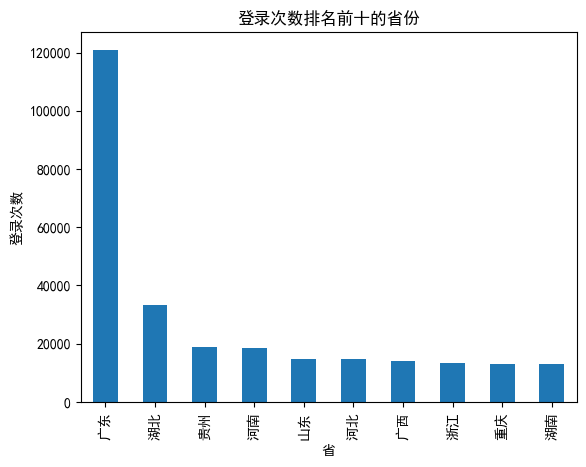

In [69]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 解决汉字显示为□指定默认字体为黑体。
plt.rcParams['axes.unicode_minus'] = False   # 解决保存图像时 负号'-' 显示为□和报错的问题。
# 分析登录前10的省份数据
# 1、对省份进行分组聚合
ans=login.groupby('省')['用户id'].count()
# value_counts()：查看一列元素的数量
# login['省'].value_counts()  # 直接就是排序后的结果
# 2、排序
ans.sort_values(ascending=False,  # 升序降序,true:↑
               inplace=True)
# 3、取前十
ans[:10].plot.bar(title='登录次数排名前十的省份',ylabel='登录次数')
# 4、可视化
# plt.title('登录次数排名前十的省份')
# plt.ylabel('登录次数')

## 登陆数据每月环比图

([<matplotlib.axis.XTick at 0x2de6144fcd0>,
 [Text(1, 0, '1月'),
  Text(2, 0, '2月'),
  Text(3, 0, '3月'),
  Text(4, 0, '4月'),
  Text(5, 0, '5月'),
  Text(6, 0, '6月'),
  Text(7, 0, '7月'),
  Text(8, 0, '8月'),
  Text(9, 0, '9月'),
  Text(10, 0, '10月'),
  Text(11, 0, '11月'),
  Text(12, 0, '12月')])

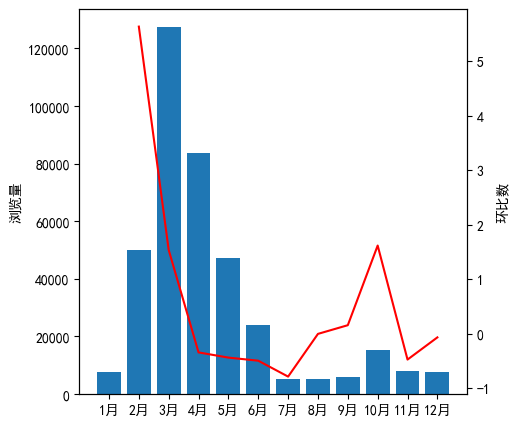

In [84]:
#每月环比图
ans=login.groupby('登陆月份')['用户id'].count()
# 环比数据：（这个-上）/上
huanbi=(ans[1:].values-ans[:-1].values)/ans[:-1].values
# 正常画柱状图
# 创建一个画布
fig=plt.figure(figsize=(5,5))
# 在画布上创建一个子图
ax=fig.add_subplot(111)
# 献花柱状图
plt.bar(ans.index,ans.values)
plt.ylabel('浏览量')
# 创建一个新的子图，子图复制X轴，这样可以产生不同的y轴
ax1=ax.twinx()
plt.plot(np.arange(2,13),huanbi,color='red')
plt.ylabel('环比数')
# 设置X轴的刻度数据
plt.xticks(np.arange(1,13),[f'{i}月' for i in range(1,13)])

## 课程销售、销售额散点图

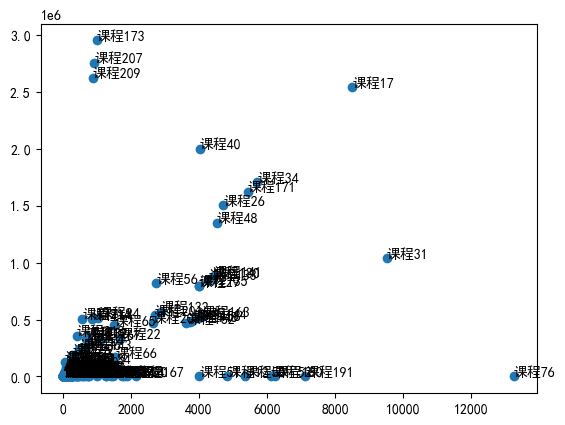

In [90]:
ans=study_information.groupby('课程id').agg({'用户id':'count',
                                      '课程单价':'sum'})
ans.columns=['销量','销售额']
plt.scatter(ans['销量'],ans['销售额'])
for i in ans.index:
    plt.text(ans.loc[i,'销量'],ans.loc[i,'销售额'],i)

In [85]:
study_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194974 entries, 0 to 194973
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   用户id     194974 non-null  object        
 1   课程id     194974 non-null  object        
 2   加入课程的时间  194974 non-null  datetime64[ns]
 3   学习进度     194974 non-null  object        
 4   课程单价     194974 non-null  float64       
 5   学习进度_数字  194974 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 8.9+ MB
